In [170]:
import os
import yaml
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import PIL

In [171]:
# Cargar configuración
with open("../config.yaml", "r") as f:
    config = yaml.safe_load(f)

data_path = config["paths"]["prepared_data"]
img_height = config["image"]["height"]
img_width = config["image"]["width"]
batch_size = config["training"]["batch_size"]

Found 822 images belonging to 7 classes.


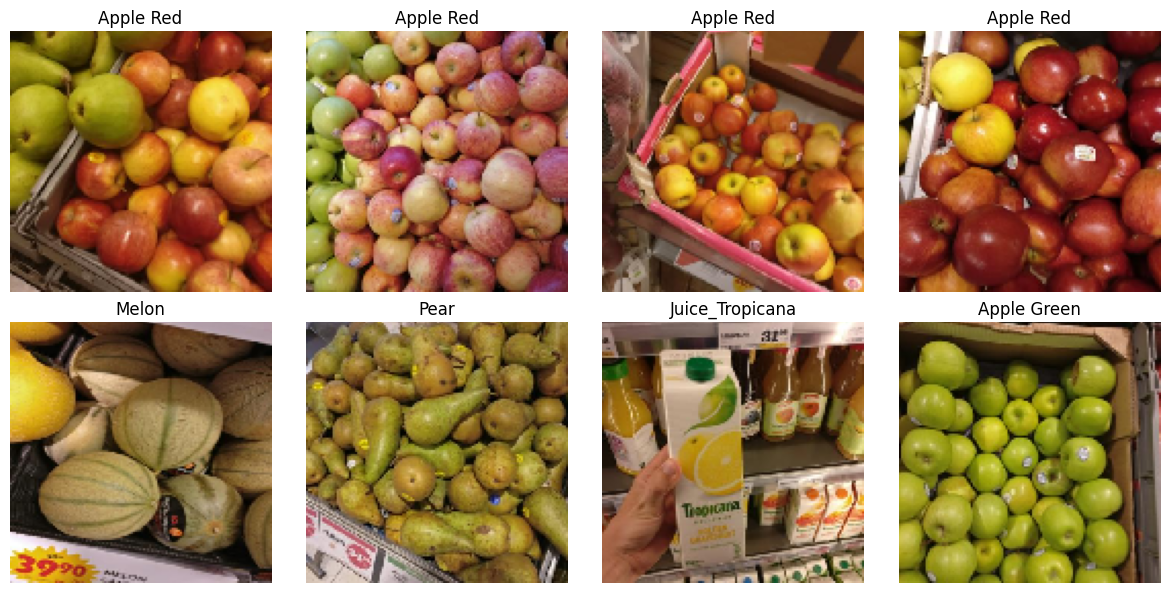

In [172]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, "train_reduced_balanced"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

# Visualizar algunas imágenes
class_names = list(train_generator.class_indices.keys())
images, labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()

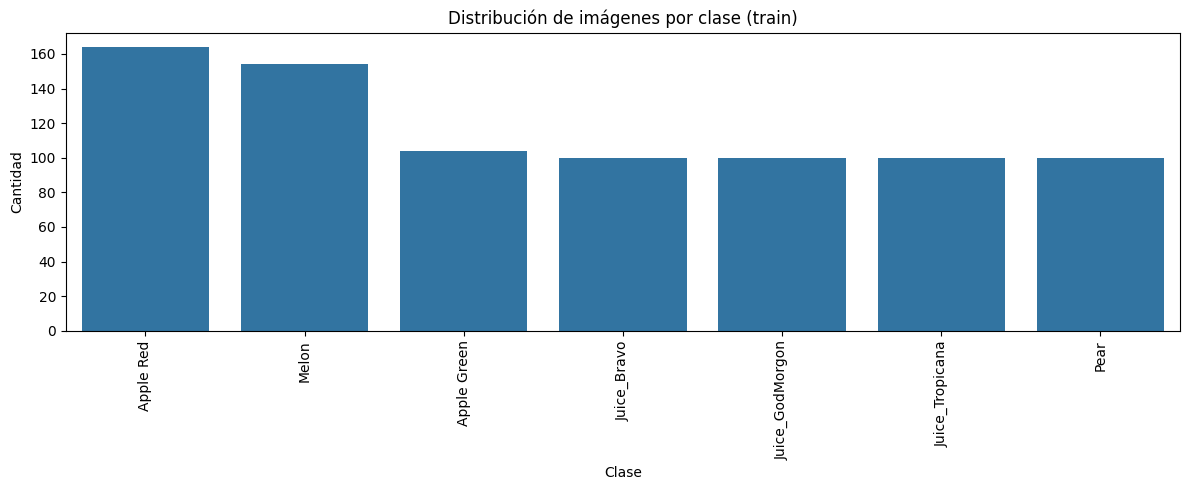

In [173]:
from collections import Counter

class_counts = Counter(train_generator.classes)
sorted_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(12, 5))
sns.barplot(x=[class_names[k] for k in sorted_counts.keys()],
            y=list(sorted_counts.values()))
plt.xticks(rotation=90)
plt.title("Distribución de imágenes por clase (train)")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

In [174]:
# Cargar set de validación
val_generator = train_datagen.flow_from_directory(
    os.path.join(data_path, "val_reduced"),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

# Comprobar que las clases coincidan
assert train_generator.class_indices == val_generator.class_indices
print("✅ Las clases del conjunto de entrenamiento y validación son consistentes.")

Found 136 images belonging to 7 classes.
✅ Las clases del conjunto de entrenamiento y validación son consistentes.


In [175]:
import pandas as pd
import numpy as np

# Obtener nombres de clases y sus índices
class_names = list(train_generator.class_indices.keys())

# Obtener la cantidad de imágenes por clase
labels = train_generator.classes  # esto es un array con la clase de cada imagen
counts = np.bincount(labels)     # cuenta cuántas veces aparece cada clase

# Crear DataFrame
df_classes = pd.DataFrame({
    'Clase': class_names,
    'Cantidad de imágenes': counts
})

# Ordenar por cantidad descendente
df_classes = df_classes.sort_values(by='Cantidad de imágenes', ascending=False).reset_index(drop=True)

# Mostrar tabla
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Visualizar la tabla (si estás en notebook)
import IPython.display as display
display.display(df_classes)

,Clase,Cantidad de imágenes
0,Apple Red,164
1,Melon,154
2,Apple Green,104
3,Juice_Bravo,100
4,Juice_GodMorgon,100
5,Juice_Tropicana,100
6,Pear,100


In [176]:
# ✍️ Reflexión: ¿hay clases poco representadas? ¿se requiere balanceo?

# Comentarios al EDA

### La cantidad de imágenes que conforman las clases no están bien equilibradas. La clase que más tiene es la "Fruit_Apple_Royal-Gala" con 65 imágenes. La que menos tiene es la "Packages_Juice_Tropicana-Mandarin-Morning" con 10 imágenes. Esto hace necesario implementar técnica de "Data Augmentation" y "Class Weights" para tratar este desbalance existente. O evaluar la eliminación de clases irrelevantes en el modelo.